<a href="https://colab.research.google.com/github/siddhartha42/wafer-defect-classification-using-deep-learining/blob/main/Group10_wafer_defect_classification_by_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/"


Mounted at /content/drive
 1649320090099334562536774860764.jpg
 16493206538137793874556722107908.jpg
 16493207390992123822792285323081.jpg
 2_Template.gdoc
 5_6267055994438683427.gdoc
 a3alp3.gdoc
 Abstract.gdoc
'Academic Calendar Jan-May 2023.pdf'
'Application for summer internship.pdf'
 APS-DFD_Supponen_EPFL_2014.mp4
 assignment2.docx
'Assignment 2 ME2400.pdf'
'Assignment 2.pdf'
'Assignment 3b.gdoc'
 assignment4q1.mlx
 assignment4q2.mlx
'Autodesk Fusion 360 (Education License) 2023-06-12 10-39-29.mp4'
'Automan Group Project.gdoc'
'Ball Screw 2.gslides'
'Be a Sir.gdoc'
'Book1 (2).xlsx'
'Bottom Purging Compliance.gsheet'
'Campbell - Biology. Volume 1-Pearson (2005).pdf'
'car insurance 2021.pdf'
 Classroom
'Colab Notebooks'
'Computer files'
'Copy of 6479_SteelManufacturingFreePresentationTemplate_S.pptx'
'Copy of Application template - Summers 2022-23.docx'
'Copy of Putumbaka Karthikeya _ Assignment 3a (1).gdoc'
'Copy of Putumbaka Karthikeya _ Assignment 3a.gdoc'
'Covering letter to rep

In [ ]:
!pip install gdown
!pip install joblib

In [ ]:
import gdown
import os
import pandas as pd

# Define the Google Drive file ID
file_id = "1--8D05rxQ52_U14wKOx-3KsydWdIYhxO"

# Define the file name for the downloaded .pkl file
output_file = "/content/LSWMD.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Download the file from Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

# Load the .pkl file into a Pandas DataFrame
df = pd.read_pickle(output_file)

# Display information about the DataFrame
df.info()


Downloading...
From: https://drive.google.com/uc?id=1--8D05rxQ52_U14wKOx-3KsydWdIYhxO
To: /content/LSWMD.pkl
100%|██████████| 2.10G/2.10G [00:26<00:00, 78.1MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [ ]:
df = df.drop(['waferIndex'], axis = 1)

In [ ]:
import numpy as np

def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
46551,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1623.0,lot3954,[[Training]],[[Edge-Loc]],"(45, 46)"
223705,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",1040.0,lot14080,[],[],"(45, 30)"
142346,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot9209,[],[],"(32, 29)"
96687,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2597.0,lot6781,[],[],"(57, 58)"
805361,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1060.0,lot47293,[[Test]],[[none]],"(41, 33)"


In [ ]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

/usr/local/lib/python3.10/dist-packages/pandas/core/array_algos/replace.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [ ]:
tol_wafers = df.shape[0]
tol_wafers

811457

In [ ]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df[(df['failureNum']==8)]
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]

(172950, 25519, 147431)

<ipython-input-10-81cf9527c436>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2)


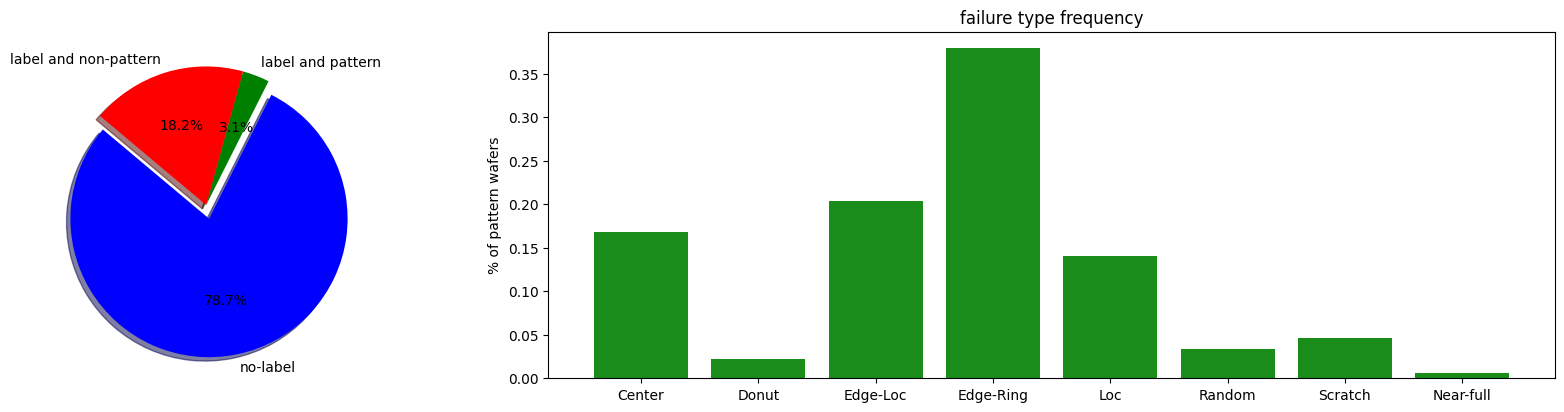

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
fig = plt.figure(figsize=(20, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['blue', 'green', 'red']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label and pattern','label and non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='green', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

In [ ]:
sub_df = df.loc[df['waferMapDim'] == (26, 26)]
sub_wafer = sub_df['waferMap'].values

sw = np.ones((1, 26, 26))
label = list()

for i in range(len(sub_df)):
    # skip null label
    if len(sub_df.iloc[i,:]['failureType']) == 0:
        continue
    sw = np.concatenate((sw, sub_df.iloc[i,:]['waferMap'].reshape(1, 26, 26)))
    label.append(sub_df.iloc[i,:]['failureType'][0][0])

In [ ]:
x = sw[1:]
y = np.array(label).reshape((-1,1))

In [ ]:
print('x shape : {}, y shape : {}'.format(x.shape, y.shape))

x shape : (14366, 26, 26), y shape : (14366, 1)


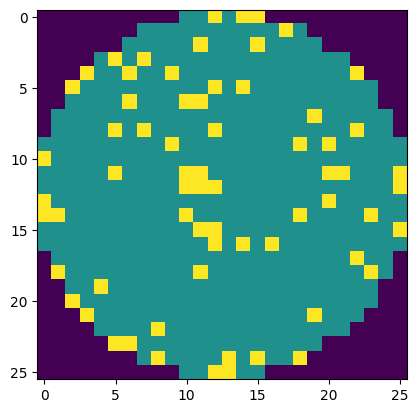

Faulty case : ['none'] 


In [ ]:
# plot 1st data
plt.imshow(x[2040])
plt.show()

# check faulty case
print('Faulty case : {} '.format(y[2040]))

In [ ]:
x = x.reshape((-1, 26, 26, 1))

In [ ]:
faulty_case = np.unique(y)
print('Faulty case list : {}'.format(faulty_case))

Faulty case list : ['Center' 'Donut' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random'
 'Scratch' 'none']


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(y[y==f])))

Center : 90
Donut : 1
Edge-Loc : 296
Edge-Ring : 31
Loc : 297
Near-full : 16
Random : 74
Scratch : 72
none : 13489


In [ ]:
new_x = np.zeros((len(x), 26, 26, 3))

for w in range(len(x)):
    for i in range(26):
        for j in range(26):
            new_x[w, i, j, int(x[w, i, j])] = 1

In [ ]:
new_x.shape

(14366, 26, 26, 3)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras import layers, models

# Encoder
input_shape = (26, 26, 3)
input_tensor = Input(input_shape)
encode = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input_tensor)

latent_vector = layers.MaxPool2D()(encode)

# Decoder
decode_layer_1 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='sigmoid')

# connect decoder layers
decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)

ae = models.Model(input_tensor, output_tensor(decode))
ae.compile(optimizer = 'Adam',
              loss = 'mse',
             )

In [ ]:
epoch=30
batch_size=1024

In [ ]:
# start train
ae.fit(new_x, new_x,
       batch_size=batch_size,
       epochs=epoch,
       verbose=2)

Epoch 1/30
15/15 - 11s - loss: 0.1512 - 11s/epoch - 737ms/step
Epoch 2/30
15/15 - 1s - loss: 0.0950 - 554ms/epoch - 37ms/step
Epoch 3/30
15/15 - 1s - loss: 0.0837 - 578ms/epoch - 39ms/step
Epoch 4/30
15/15 - 1s - loss: 0.0726 - 627ms/epoch - 42ms/step
Epoch 5/30
15/15 - 1s - loss: 0.0636 - 629ms/epoch - 42ms/step
Epoch 6/30
15/15 - 1s - loss: 0.0562 - 572ms/epoch - 38ms/step
Epoch 7/30
15/15 - 1s - loss: 0.0504 - 559ms/epoch - 37ms/step
Epoch 8/30
15/15 - 1s - loss: 0.0454 - 557ms/epoch - 37ms/step
Epoch 9/30
15/15 - 1s - loss: 0.0403 - 559ms/epoch - 37ms/step
Epoch 10/30
15/15 - 1s - loss: 0.0352 - 559ms/epoch - 37ms/step
Epoch 11/30
15/15 - 1s - loss: 0.0307 - 563ms/epoch - 38ms/step
Epoch 12/30
15/15 - 1s - loss: 0.0271 - 554ms/epoch - 37ms/step
Epoch 13/30
15/15 - 1s - loss: 0.0243 - 550ms/epoch - 37ms/step
Epoch 14/30
15/15 - 1s - loss: 0.0220 - 565ms/epoch - 38ms/step
Epoch 15/30
15/15 - 1s - loss: 0.0201 - 573ms/epoch - 38ms/step
Epoch 16/30
15/15 - 1s - loss: 0.0186 - 602ms/epo

In [ ]:
encoder = models.Model(input_tensor, latent_vector)

In [ ]:
decoder_input = Input((13, 13, 64))
decode = decode_layer_1(decoder_input)
decode = decode_layer_2(decode)

decoder = models.Model(decoder_input, output_tensor(decode))

In [ ]:
# Encode original faulty wafer
encoded_x = encoder.predict(new_x)

449/449 [==============================] - 1s 2ms/step


In [ ]:
# Add noise to encoded latent faulty wafers vector.
noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))

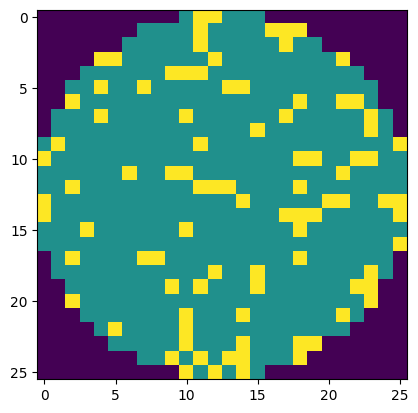

In [ ]:
# check original faulty wafer data
plt.imshow(np.argmax(new_x[3], axis=2))

449/449 [==============================] - 1s 3ms/step


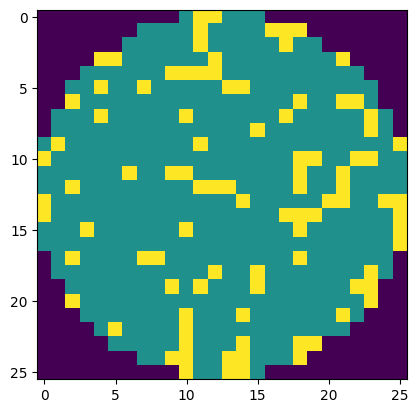

In [ ]:
# check new noised faulty wafer data
noised_gen_x = np.argmax(decoder.predict(noised_encoded_x), axis=3)
plt.imshow(noised_gen_x[3])

In [ ]:
# augment function define
def gen_data(wafer, label):
    # Encode input wafer
    encoded_x = encoder.predict(wafer)

    # dummy array for collecting noised wafer
    gen_x = np.zeros((1, 26, 26, 3))

    # Make wafer until total # of wafer to 2000
    for i in range((2000//len(wafer)) + 1):
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))
        noised_gen_x = decoder.predict(noised_encoded_x)
        gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)
    # also make label vector with same length
    gen_y = np.full((len(gen_x), 1), label)

    # return date without 1st dummy data.
    return gen_x[1:], gen_y[1:]

In [ ]:
# Augmentation for all faulty case.
for f in faulty_case :
    # skip none case
    if f == 'none' :
        continue

    gen_x, gen_y = gen_data(new_x[np.where(y==f)[0]], f)
    new_x = np.concatenate((new_x, gen_x), axis=0)
    y = np.concatenate((y, gen_y))

3/3 [==============================] - 0s 8ms/step


In [ ]:
print('After Generate new_x shape : {}, new_y shape : {}'.format(new_x.shape, y.shape))

After Generate new_x shape : (30707, 26, 26, 3), new_y shape : (30707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(y[y==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 13489


In [ ]:
none_idx = np.where(y=='none')[0][np.random.choice(len(np.where(y=='none')[0]), size=11000, replace=False)]

In [ ]:
new_x = np.delete(new_x, none_idx, axis=0)
new_y = np.delete(y, none_idx, axis=0)

In [ ]:
print('After Delete "none" class new_x shape : {}, new_y shape : {}'.format(new_x.shape, new_y.shape))

After Delete "none" class new_x shape : (19707, 26, 26, 3), new_y shape : (19707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(new_y[new_y==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 2489


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

for i, l in enumerate(faulty_case):
    new_y[new_y==l] = i

# one-hot-encoding
new_y = to_categorical(new_y)

In [ ]:
new_X=new_x[0:19000]
new_Y=new_y[0:19000]
test_x=new_x[19001:19706]
test_y=new_y[19001:19706]
test_x.shape

(705, 26, 26, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_X, new_Y,
                                                    test_size=0.33,
                                                    random_state=2019)

In [ ]:
print('Train x : {}, y : {}'.format(x_train.shape, y_train.shape))
print('Test x: {}, y : {}'.format(x_test.shape, y_test.shape))

Train x : (12730, 26, 26, 3), y : (12730, 9)
Test x: (6270, 26, 26, 3), y : (6270, 9)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D
from keras.models import Model
import numpy as np

# Define your create_model function for your Keras model
def create_model():
    input_shape = (26, 26, 3)
    input_tensor = Input(input_shape)

    conv_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_tensor)
    conv_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_1)
    conv_3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_2)

    flat = Flatten()(conv_3)

    dense_1 = Dense(512, activation='relu')(flat)
    dense_2 = Dense(128, activation='relu')(dense_1)
    output_tensor = Dense(9, activation='softmax')(dense_2)

    model = Model(input_tensor, output_tensor)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define input_dim and output_dim based on your data
input_dim = x_train.shape[1]  # Define the input dimension
output_dim = y_train.shape[1]  # Define the output dimension

# Convert your training data to numpy arrays if not already
x_train = np.array(x_train)
y_train = np.array(y_train)

# 3-Fold Cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=2019)
results = []

for train_index, val_index in kfold.split(x_train, np.argmax(y_train, axis=1)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()
    history=model.fit(x_train_fold, y_train_fold,
                      validation_data=[x_test, y_test],
                      epochs=30, batch_size=1024, verbose=2)
    _, accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    results.append(accuracy)

# Check 3-fold model's mean accuracy
print('Simple CNN Cross-validation score: {:.4f}'.format(np.mean(results)))


Epoch 1/30
9/9 - 8s - loss: 2.0731 - accuracy: 0.3296 - val_loss: 1.0552 - val_accuracy: 0.6153 - 8s/epoch - 861ms/step
Epoch 2/30
9/9 - 2s - loss: 0.8367 - accuracy: 0.6792 - val_loss: 0.7918 - val_accuracy: 0.7397 - 2s/epoch - 192ms/step
Epoch 3/30
9/9 - 2s - loss: 0.6389 - accuracy: 0.7861 - val_loss: 0.4951 - val_accuracy: 0.8241 - 2s/epoch - 189ms/step
Epoch 4/30
9/9 - 2s - loss: 0.4347 - accuracy: 0.8708 - val_loss: 0.3658 - val_accuracy: 0.8735 - 2s/epoch - 186ms/step
Epoch 5/30
9/9 - 2s - loss: 0.2549 - accuracy: 0.9240 - val_loss: 0.2325 - val_accuracy: 0.9139 - 2s/epoch - 224ms/step
Epoch 6/30
9/9 - 2s - loss: 0.1644 - accuracy: 0.9497 - val_loss: 0.1458 - val_accuracy: 0.9589 - 2s/epoch - 224ms/step
Epoch 7/30
9/9 - 2s - loss: 0.0933 - accuracy: 0.9762 - val_loss: 0.0788 - val_accuracy: 0.9810 - 2s/epoch - 225ms/step
Epoch 8/30
9/9 - 2s - loss: 0.0542 - accuracy: 0.9889 - val_loss: 0.0644 - val_accuracy: 0.9815 - 2s/epoch - 225ms/step
Epoch 9/30
9/9 - 2s - loss: 0.0301 - acc

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


196/196 [==============================] - 1s 6ms/step - loss: 0.0339 - accuracy: 0.9898
Test Loss: 0.033877093344926834
Test Accuracy: 0.9897926449775696


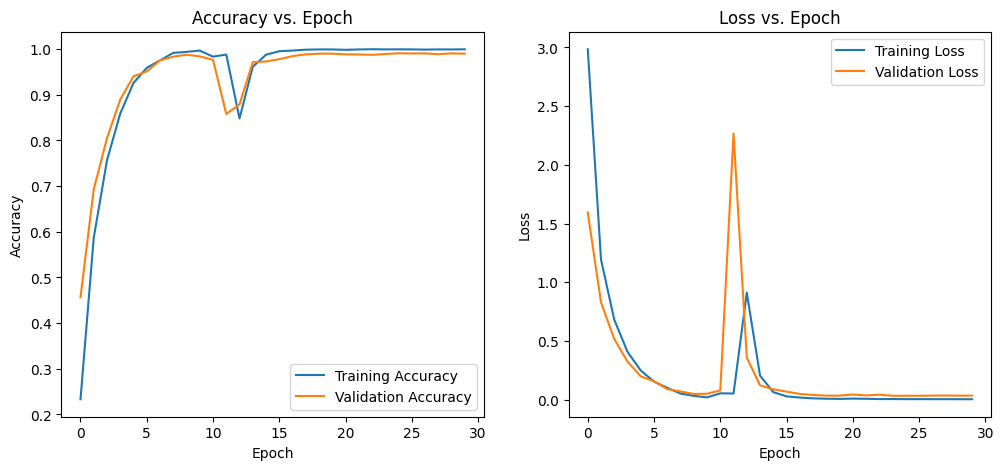

133/133 [==============================] - 1s 4ms/step


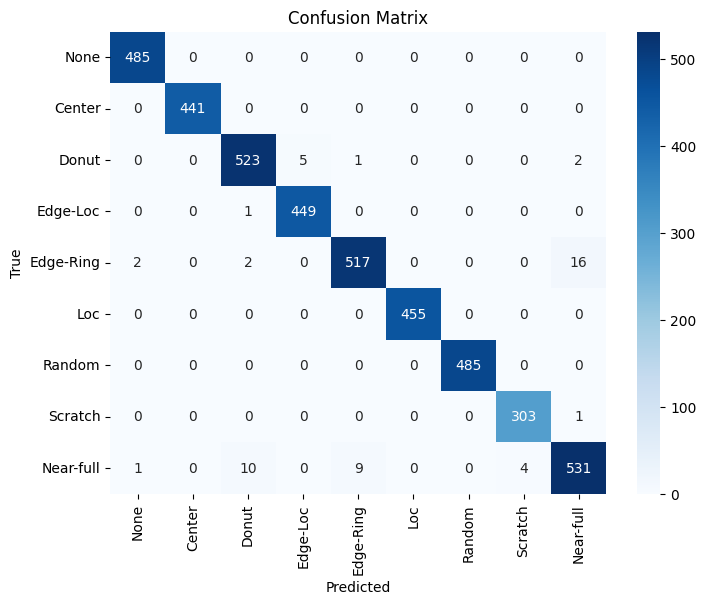

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot accuracy vs. epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss vs. epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Create a confusion matrix
y_pred = model.predict(x_val_fold)
y_true = np.argmax(y_val_fold, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = ['None','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

# Create the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 26, 26, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        9280      
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 86528)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               44302848  
                                                                 
 dense_7 (Dense)             (None, 128)               6566

1/1 [==============================] - 0s 38ms/step
Actual Label: Near-full
1/1 [==============================] - 0s 76ms/step


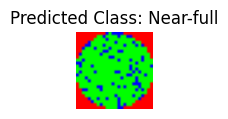

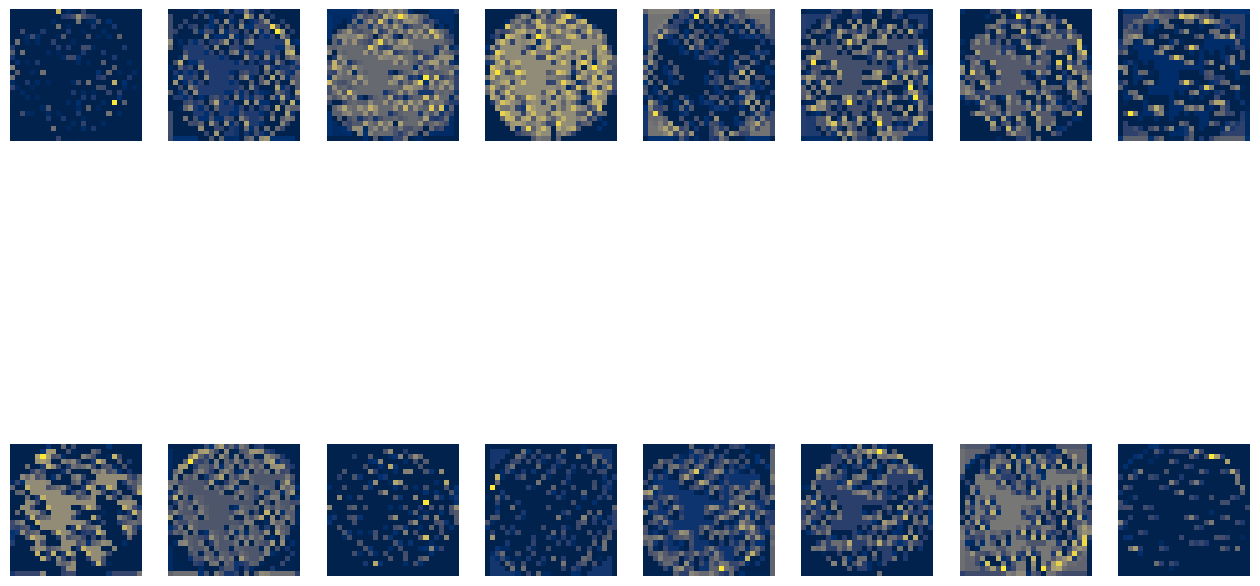

1/1 [==============================] - 0s 85ms/step


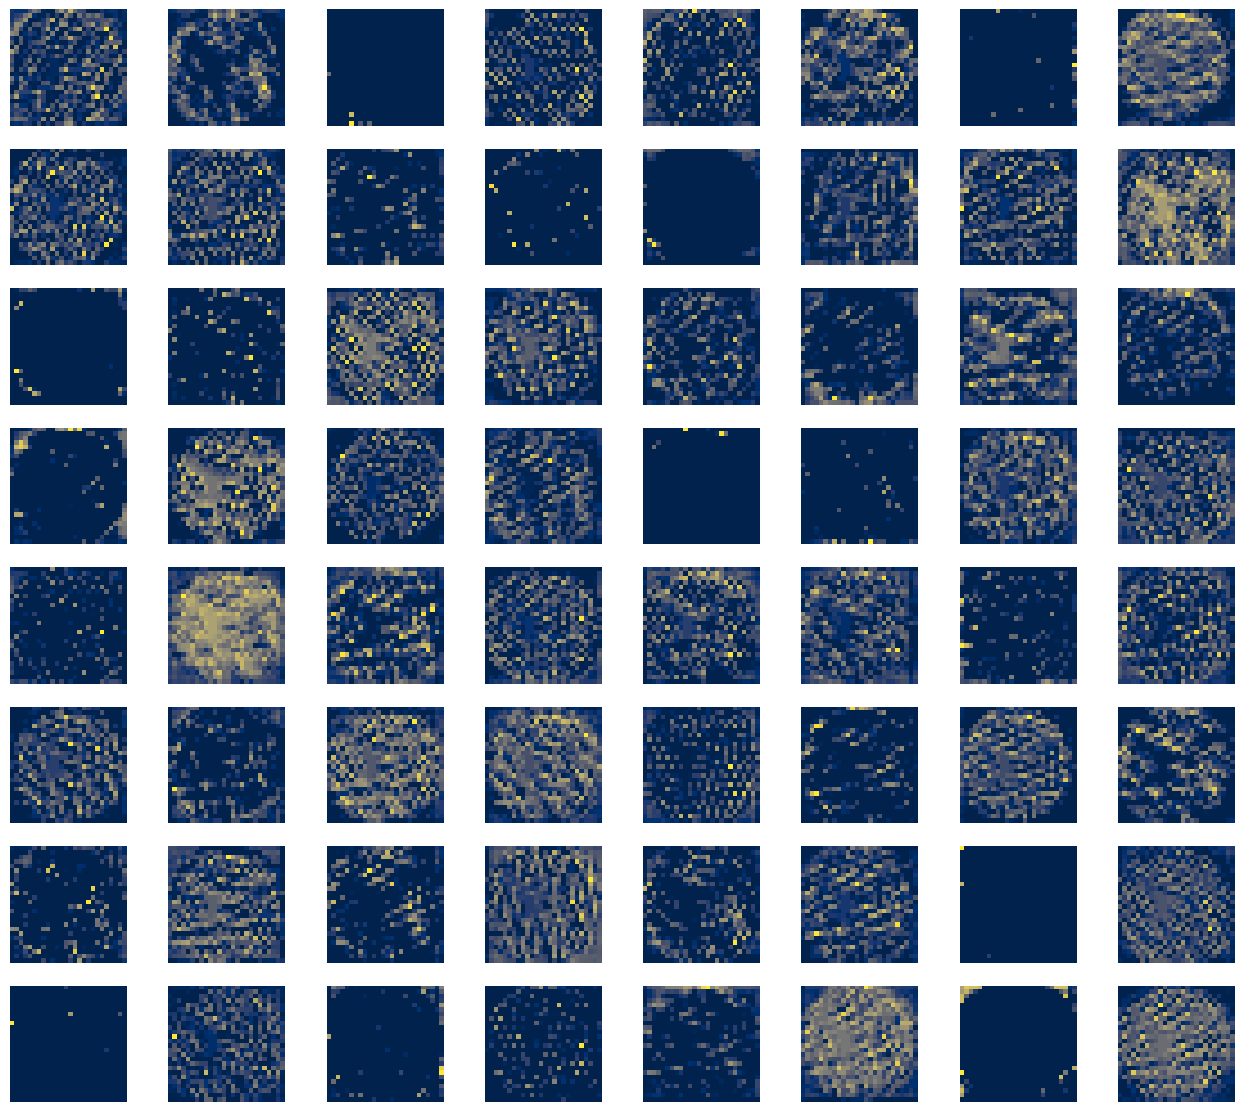

1/1 [==============================] - 0s 94ms/step


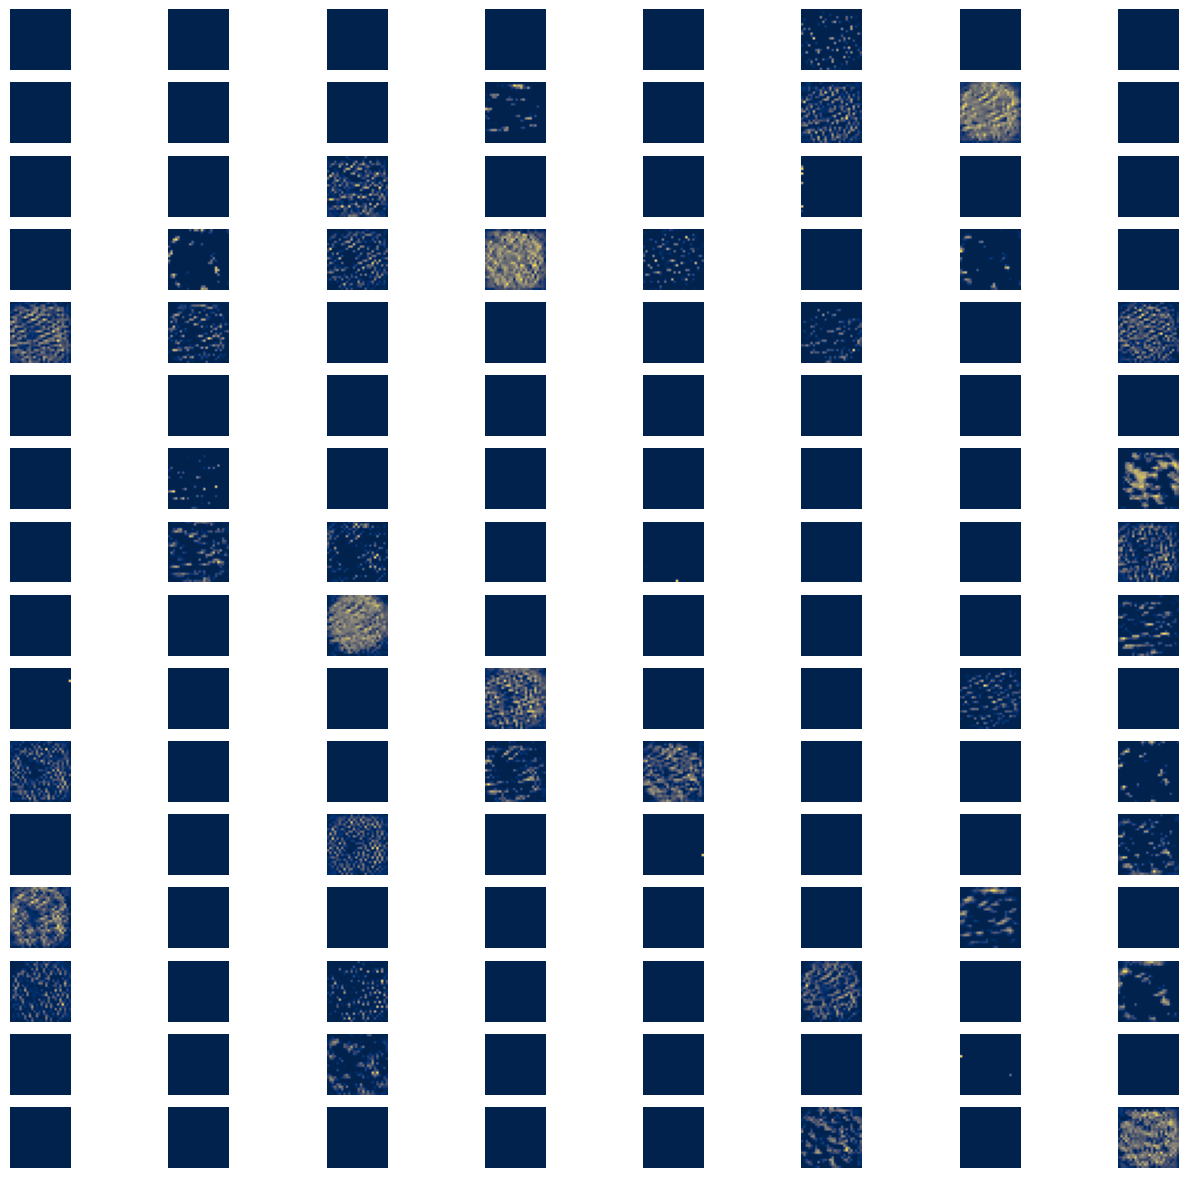

1/1 [==============================] - 0s 79ms/step
dense_6 has no spatial dimensions to visualize.
1/1 [==============================] - 0s 72ms/step
dense_7 has no spatial dimensions to visualize.
1/1 [==============================] - 0s 104ms/step
dense_8 has no spatial dimensions to visualize.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model

class_names = ['None','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

def visualize_feature_maps(model, layer_name, input_image):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(input_image)

    if len(intermediate_output.shape) > 2:
        num_feature_maps = intermediate_output.shape[-1]

        # Calculate the number of rows and columns for subplots
        num_rows = num_feature_maps // 8 + 1  # 8 feature maps per row
        num_cols = 8

        # Plot the feature maps
        plt.figure(figsize=(16, 16))
        for i in range(num_feature_maps):
            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(intermediate_output[0, :, :, i],cmap='cividis')
            plt.axis('off')
        plt.show()
    else:
        # Dense layer output is a 2D feature vector, so no spatial dimensions to visualize
        print(f'{layer_name} has no spatial dimensions to visualize.')


# Define a function to overlay the predicted class label on the image
def overlay_class_label(image, predicted_class_index, class_names):
    plt.figure(figsize=(1, 1))
    plt.imshow(image[0], cmap='inferno')
    plt.axis('off')
    plt.title(f'Predicted Class: {class_names[predicted_class_index]}', fontsize=12)

# Select the index of the test element you want to evaluate
test_index = 1000 # Change this to the index you want to evaluate

# Extract the single test element and its corresponding label
single_x_test = x_test[test_index]
single_y_test = y_test[test_index]

# Reshape the single test element to match the input shape expected by the model
single_x_test = single_x_test.reshape(1, *single_x_test.shape)

# Evaluate the model on the single test element
y_pred = model.predict(single_x_test)
predicted_class_index = np.argmax(y_pred)

actual_class_index = np.argmax(single_y_test)

# Overlay the predicted class label on the image
overlay_class_label(single_x_test, predicted_class_index, class_names)

# Print the actual label
print('Actual Label:', class_names[actual_class_index])

# List of layer names you want to visualize
layer_names = ['conv2d_7', 'conv2d_8', 'conv2d_9', 'dense_6', 'dense_7', 'dense_8']

# Visualize feature maps at each layer
for layer in layer_names:
    visualize_feature_maps(model, layer, single_x_test)
